In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("data/customer.csv")

In [216]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
Countries = one_hot_encoder.fit_transform(df[['Geography']])

encoded_countries = pd.DataFrame(Countries, columns=one_hot_encoder.get_feature_names_out(['Geography']))
df = pd.concat([df, encoded_countries], axis=1)

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography'])

In [217]:
X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [219]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

tree.fit(X_train_scaled, y_train)
tree_pred = tree.predict(X_test_scaled)

print("----- Decision Tree -----")
print(f"Accuracy: {tree.score(X_test_scaled, y_test) * 100:.2f}%")

print("\n----- Classification Report -----")
print(classification_report(y_test, tree_pred))

----- Decision Tree -----
Accuracy: 79.60%

----- Classification Report -----
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1607
           1       0.48      0.49      0.48       393

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000



In [ ]:
forest = RandomForestClassifier(class_weight='balanced', random_state=42)

forest.fit(X_train_scaled, y_train)
forest_pred = forest.predict(X_test_scaled)

print("----- Random Forest -----")
print(f"Accuracy: {forest.score(X_test_scaled, y_test) * 100:.2f}%")

print("\n----- Classification Report -----")
print(classification_report(y_test, forest_pred))

----- Random Forest -----
Accuracy: 86.60%

----- Classification Report -----
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



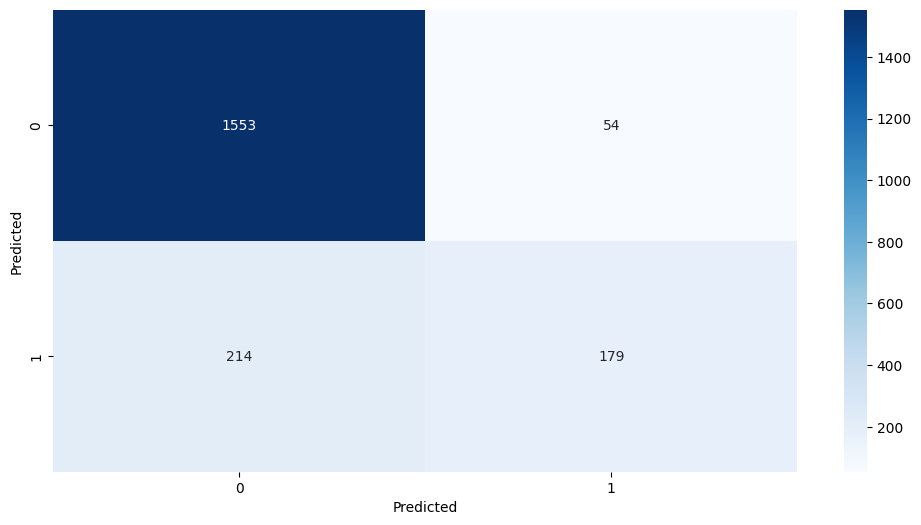

In [221]:
cm = confusion_matrix(y_test, forest_pred)

fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Predicted')

plt.show()